In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [4]:
df.shape

(660, 15)

# Q1: What is the total number of goals scored in the entire dataset?




In [28]:
total_goals = df['Goals'].sum()
print("Total number of goals scored in the dataset:", total_goals)

Total number of goals scored in the dataset: 7795


# Q2: Which player has scored the most goals as a substitution

In [38]:
substitute_players = df[df["Substitution "] > 0]

substitute_players_sorted = substitute_players.sort_values("Goals", ascending=False)

top_scorer_substitute = substitute_players_sorted.iloc[0]

player_name = top_scorer_substitute["Player Names"]
goals_scored = top_scorer_substitute["Goals"]

print(f"The player who has scored the most goals as a substitution is {player_name} with {goals_scored} goals.")


The player who has scored the most goals as a substitution is Lionel Messi with 37 goals.


# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [13]:

data_sorted = df.sort_values("Goals", ascending=False)


top_players = data_sorted.head(5)

total_goals = top_players["Goals"].sum()

print("Top 5 players with the most goals:")
print(top_players[["Player Names", "Club", "Goals"]])
print("Total number of goals scored by the top 5 players:", total_goals)


Top 5 players with the most goals:
          Player Names   Club  Goals
5    Cristiano Ronaldo  (JUV)     42
12        Lionel Messi  (BAR)     37
391      Ciro Immobile  (LAZ)     36
195       Lionel Messi  (BAR)     36
317        Carlos Vela  (LAF)     36
Total number of goals scored by the top 5 players: 187


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [14]:
country_counts = df["Country"].value_counts()

top_countries = country_counts.head(10)

print("Top 10 countries with the most number of players:")
print(top_countries)


Top 10 countries with the most number of players:
Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [15]:

lower_quantile = df["Mins"].quantile(0.01)
upper_quantile = df["Mins"].quantile(0.99)

filtered_data = df[(df["Mins"] >= lower_quantile) & (df["Mins"] <= upper_quantile)]

original_rows = df.shape[0]
filtered_rows = filtered_data.shape[0]

rows_difference = original_rows - filtered_rows

print("Difference in the number of rows:", rows_difference)


Difference in the number of rows: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [16]:
player_goals = df.groupby("Player Names")["Goals"].sum()

top_players = player_goals.sort_values(ascending=False).head(5)

print("Top 5 players with the most number of goals throughout all the years:")
print(top_players)


Top 5 players with the most number of goals throughout all the years:
Player Names
Lionel Messi          135
Cristiano Ronaldo     128
Robert Lewandowski    127
Ciro Immobile         107
Luis Suarez            95
Name: Goals, dtype: int64


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

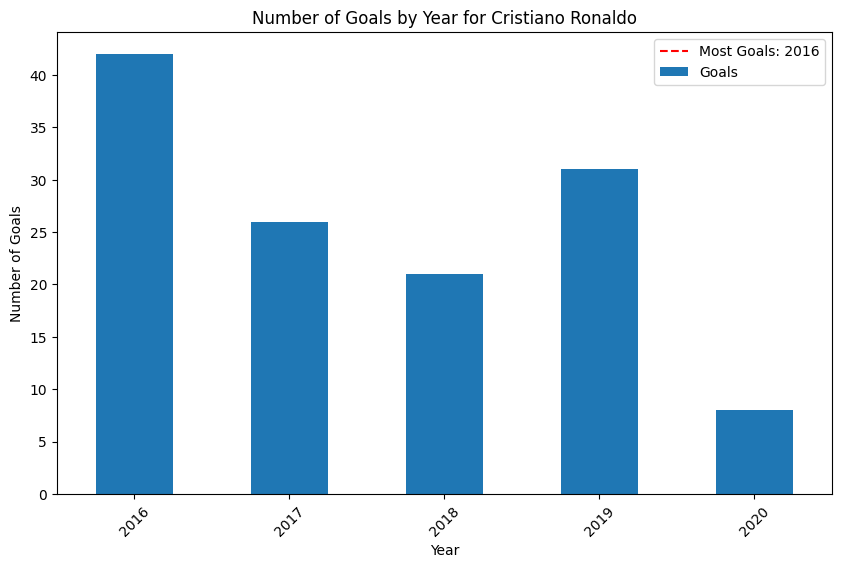

In [17]:
ronaldo_data = df[df["Player Names"] == "Cristiano Ronaldo"]

goals_by_year = ronaldo_data.groupby("Year")["Goals"].sum()

max_goals_year = goals_by_year.idxmax()

goals_by_year.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Year")
plt.ylabel("Number of Goals")
plt.title("Number of Goals by Year for Cristiano Ronaldo")
plt.xticks(rotation=45)
plt.axvline(x=max_goals_year, color='red', linestyle='--', label=f"Most Goals: {max_goals_year}")
plt.legend()
plt.show()


# Q8. In the year 2019 who has more Goals between Ronaldo and Messi?
- First print them normally
- Display the comparison using a bar plot

In [18]:
filtered_data = df[(df["Year"] == 2019) & ((df["Player Names"] == "Cristiano Ronaldo") | (df["Player Names"] == "Lionel Messi"))]
print("Goals in the year 2019:")
print(filtered_data[["Player Names", "Goals"]])


Goals in the year 2019:
          Player Names  Goals
333       Lionel Messi     25
385  Cristiano Ronaldo     31


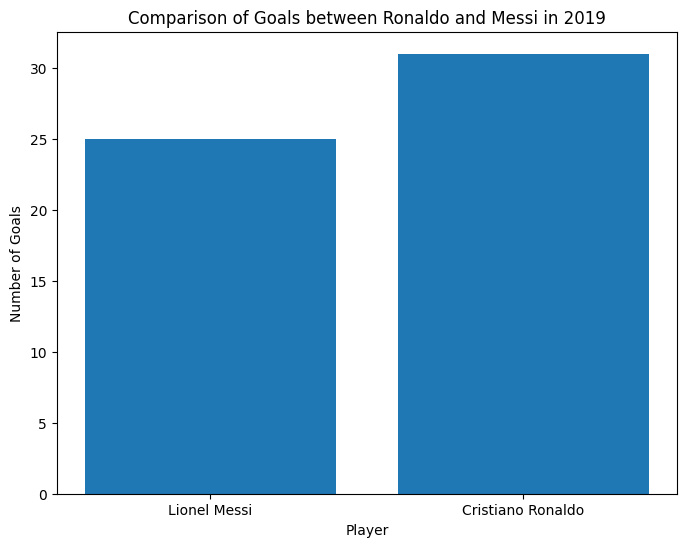

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(filtered_data["Player Names"], filtered_data["Goals"])
plt.xlabel("Player")
plt.ylabel("Number of Goals")
plt.title("Comparison of Goals between Ronaldo and Messi in 2019")
plt.show()

# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

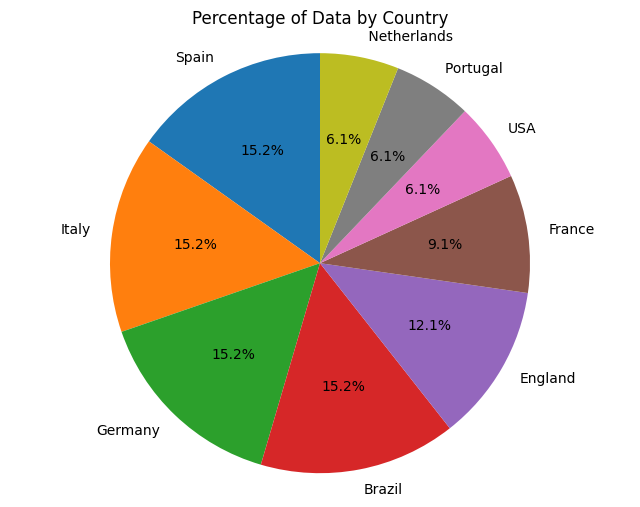

In [21]:
country_counts = df["Country"].value_counts()
labels = country_counts.index
sizes = country_counts.values
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Percentage of Data by Country")
plt.show()


# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

<ipython-input-22-ee385f5681a9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


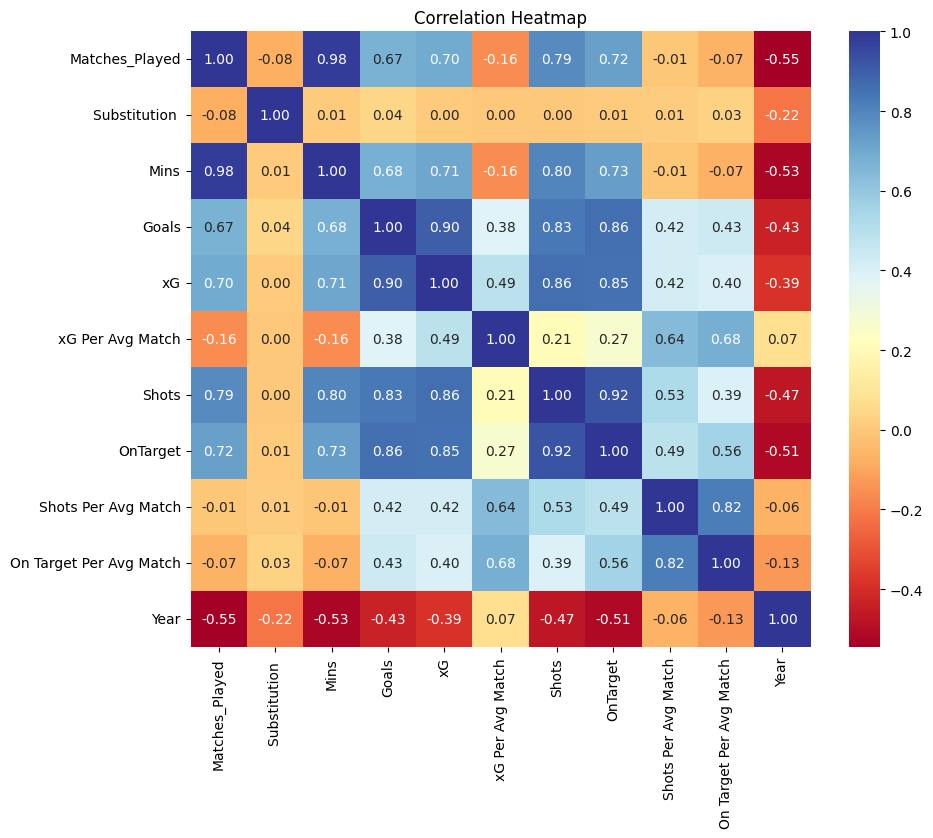

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()


# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [23]:
year_2020_data = df[df["Year"] == 2020]
country_median_shots = year_2020_data.groupby("Country")["OnTarget"].median()
max_median_country = country_median_shots.idxmax()
print("Country with the maximum median of 'OnTarget' shots in the year 2020:", max_median_country)


Country with the maximum median of 'OnTarget' shots in the year 2020:  Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [24]:
filtered_data = df[df["Matches_Played"] > 30]
filtered_data["Goals_per_minute"] = filtered_data["Goals"] / filtered_data["Mins"]
mean_goals_per_minute = filtered_data["Goals_per_minute"].mean()
sorted_data = filtered_data.sort_values("Goals_per_minute", ascending=False)
best_player = sorted_data.iloc[0]["Player Names"]
best_goals_per_minute = sorted_data.iloc[0]["Goals_per_minute"]
print(f"Player with the best average goals per minute: {best_player}")
print(f"Goals per minute: {best_goals_per_minute:.2f}")
sorted_data = sorted_data.sort_values("Goals_per_minute", ascending=False)
print("Sorted data by goals per minute:")
print(sorted_data[["Player Names", "Goals_per_minute"]])


Player with the best average goals per minute: Lionel Messi
Goals per minute: 0.01
Sorted data by goals per minute:
                  Player Names  Goals_per_minute
12                Lionel Messi          0.012715
408         Robert Lewandowski          0.012217
317                Carlos Vela          0.011509
54   Pierre-Emerick Aubameyang          0.010712
391              Ciro Immobile          0.010679
..                         ...               ...
161               Arthur Caike          0.002833
460                      Dudu           0.002717
91               Cicero Semedo          0.002709
291                Diego Souza          0.002633
472                     Artur           0.002296

[170 rows x 2 columns]


<ipython-input-24-e01b9c7db163>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Goals_per_minute"] = filtered_data["Goals"] / filtered_data["Mins"]


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [25]:
df["Missed_Shots"] = df["Shots"] - df["OnTarget"]

player_least_missed_shots = df.loc[df["Missed_Shots"].idxmin(), "Player Names"]
least_missed_shots = df["Missed_Shots"].min()

player_most_missed_shots = df.loc[df["Missed_Shots"].idxmax(), "Player Names"]
most_missed_shots = df["Missed_Shots"].max()

print("Player with the least number of missed shots:", player_least_missed_shots)
print("Number of missed shots:", least_missed_shots)
print("Player with the most number of missed shots:", player_most_missed_shots)
print("Number of missed shots:", most_missed_shots)


Player with the least number of missed shots: Esteban Burgos
Number of missed shots: 1
Player with the most number of missed shots: Cristiano Ronaldo
Number of missed shots: 129


# Q14: How many countries have had players who played more than 35 matches? Create a bar plot to display the count for each country.

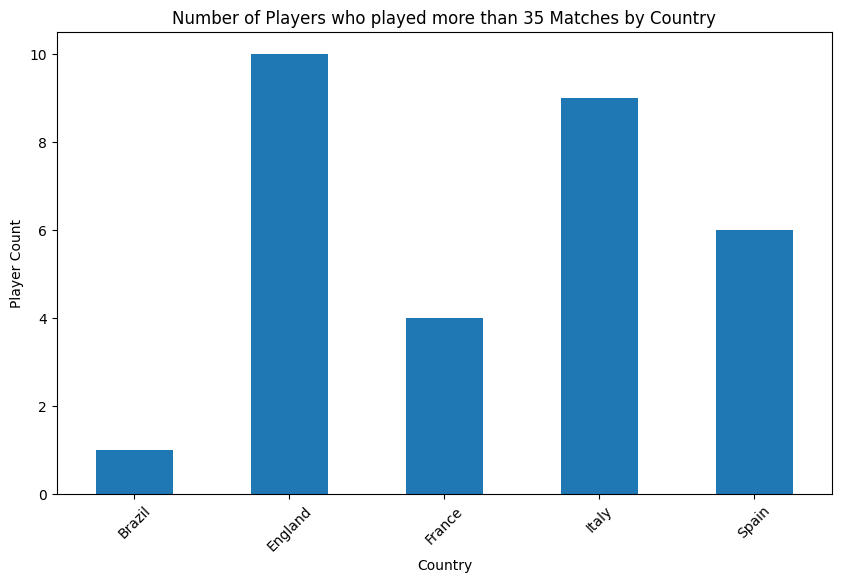

Number of countries with players who played more than 35 matches: 5


In [26]:
filtered_data = df[df["Matches_Played"] > 35]

country_counts = filtered_data["Country"].nunique()

country_player_counts = filtered_data.groupby("Country")["Player Names"].nunique()

plt.figure(figsize=(10, 6))
country_player_counts.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Player Count")
plt.title("Number of Players who played more than 35 Matches by Country")
plt.xticks(rotation=45)
plt.show()

print("Number of countries with players who played more than 35 matches:", country_counts)


# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

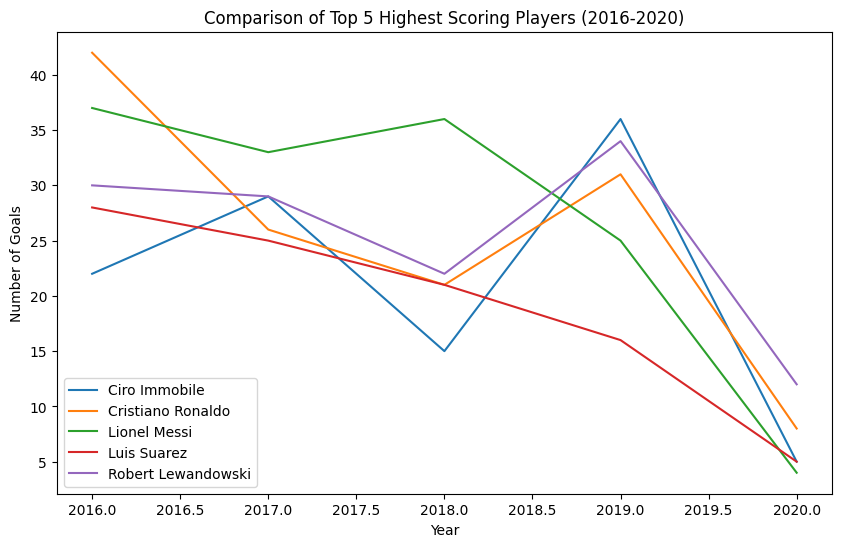

In [27]:
player_goals = df.groupby("Player Names")["Goals"].sum()

top_players = player_goals.sort_values(ascending=False).head(5)

filtered_data = df[df["Player Names"].isin(top_players.index)]

player_year_goals = filtered_data.groupby(["Player Names", "Year"])["Goals"].sum().unstack()

plt.figure(figsize=(10, 6))
for player in player_year_goals.index:
    plt.plot(player_year_goals.columns, player_year_goals.loc[player], label=player)
plt.xlabel("Year")
plt.ylabel("Number of Goals")
plt.title("Comparison of Top 5 Highest Scoring Players (2016-2020)")
plt.legend()
plt.show()
